# This Jupytr notebook shows how to introduce data and operate on THEMIS EFI data.
#
# first get into the directory you want in order to do this work
# note use of r (raw string) in setting mydirname, to treat '\' as Char rather than escape Char in Python
#

In [1]:
import os
current_directory = os.getcwd()
print("Current Directory:", current_directory)
mydirname=r"C:\My Documents\ucla\teaching\EPSS_265_2023_Fall\Lecture12_EFIs_Calibration"
# or use '\\' without 'r' to get the same effect:
mydirname="C:\\My Documents\\ucla\\teaching\\EPSS_265_2023_Fall\\Lecture12_EFIs_Calibration"
os.chdir(mydirname)
print("Current Directory:", os.getcwd()) # print it
#

Current Directory: C:\My Documents\ucla\teaching\EPSS_265_2023_Fall\Lecture07_DC_Mags_Access_Analysis
Current Directory: C:\My Documents\ucla\teaching\EPSS_265_2023_Fall\Lecture12_EFIs_Calibration


Load data in all coordinate systems available in L2 CDF

In [2]:
import pyspedas

In [3]:
from pyspedas import * # import all top level routines from pyspedas

In [4]:
from pytplot import * # and from pytplot including tplot, get_data, options, tplot_options etc.

In [5]:
import numpy as np

In [6]:
timerange_ascii = ['2008/02/26 03:00:00','2008/02/26 06:00:0']
timerange_double=time_double(timerange_ascii)

In [7]:
from numpy import * # and from numpy including pi, mean, tan, and sqrt

In [8]:
# load EFI L2 data in DSL (and GSE and GSM) along with FGM data
#
sclet='d'
mysc='th'+sclet
# this loads both FGM and EFI (spin-fits)
tvars = pyspedas.themis.fit(trange=timerange_double, time_clip='True', probe=sclet) 
tnames(tvars) # check what you loaded


11-Nov-23 00:28:23: Downloading remote index: http://themis.ssl.berkeley.edu/data/themis/thd/l2/fit/2008/
11-Nov-23 00:28:23: File is current: themis_data/thd/l2/fit/2008/thd_l2_fit_20080226_v01.cdf
11-Nov-23 00:28:25: Time clip was applied to: thd_fgs_sigma
11-Nov-23 00:28:25: Time clip was applied to: thd_fgs_dsl
11-Nov-23 00:28:25: Time clip was applied to: thd_fgs_gse
11-Nov-23 00:28:25: Time clip was applied to: thd_fgs_gsm
11-Nov-23 00:28:25: Time clip was applied to: thd_efs_sigma
11-Nov-23 00:28:25: Time clip was applied to: thd_efs_dsl
11-Nov-23 00:28:25: Time clip was applied to: thd_efs_0_dsl
11-Nov-23 00:28:25: Time clip was applied to: thd_efs_dot0_dsl
11-Nov-23 00:28:25: Time clip was applied to: thd_efs_gse
11-Nov-23 00:28:25: Time clip was applied to: thd_efs_0_gse
11-Nov-23 00:28:25: Time clip was applied to: thd_efs_dot0_gse
11-Nov-23 00:28:25: Time clip was applied to: thd_efs_gsm
11-Nov-23 00:28:25: Time clip was applied to: thd_efs_0_gsm
11-Nov-23 00:28:25: Time cl

['thd_fgs_sigma',
 'thd_fgs_dsl',
 'thd_fgs_gse',
 'thd_fgs_gsm',
 'thd_efs_sigma',
 'thd_efs_dsl',
 'thd_efs_0_dsl',
 'thd_efs_dot0_dsl',
 'thd_efs_gse',
 'thd_efs_0_gse',
 'thd_efs_dot0_gse',
 'thd_efs_gsm',
 'thd_efs_0_gsm',
 'thd_efs_dot0_gsm',
 'thd_fit_bfit',
 'thd_fit_efit']

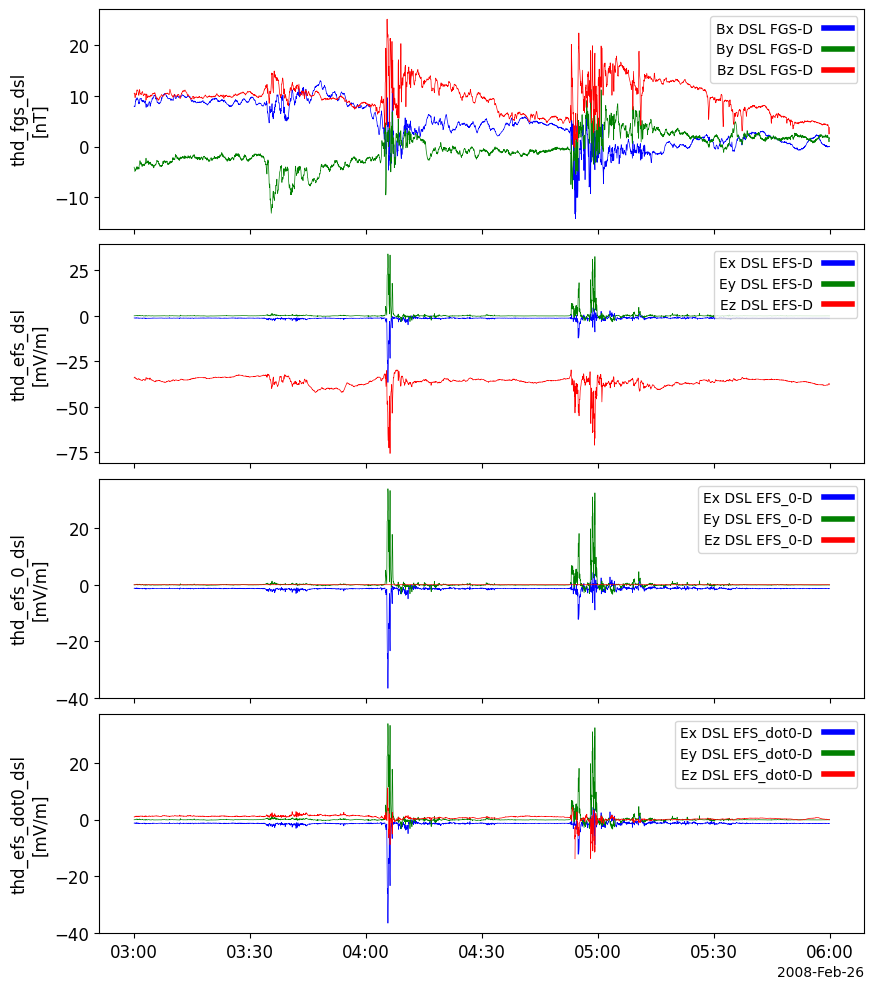

In [9]:
# plot what you want to see
mysc='th'+sclet
mytvars2plot = ['_fgs_dsl', '_efs_dsl', '_efs_0_dsl', '_efs_dot0_dsl']
mytvars2plot = ['th'+sclet + item for item in mytvars2plot]
tplot(mytvars2plot,xsize=9,ysize=12) # also set the plot size accordingly
#

In [10]:
# Interpolate FGS data on EFS times (they should not have been on different times but due to L2cal they are)
#
thx_fgs_dsl=get_data('thd_fgs_dsl')
thx_efs_dsl=get_data('thd_efs_dsl')
thx_efs_dot0_dsl=get_data('thd_efs_dot0_dsl')
print('Number of points in FGS L2 data=',thx_fgs_dsl[0].shape) # shows number of points in fgs
print('Number of points in EFS L2 data=',thx_efs_dsl[0].shape) # shows number of points in efs  
tinterpol('thd_fgs_dsl','thd_efs_dsl',newname='thd_fgs_dsl') # overwrites FGS data
thx_fgs_dsl=get_data('thd_fgs_dsl') # get the interpolated FGS data
print('Number of points in interpolated FGS L2 data=',thx_fgs_dsl[0].shape) # shows number of points in fgs
#

11-Nov-23 00:28:30: tinterpol (linear) was applied to: thd_fgs_dsl


Number of points in FGS L2 data= (3596,)
Number of points in EFS L2 data= (3554,)
Number of points in interpolated FGS L2 data= (3554,)


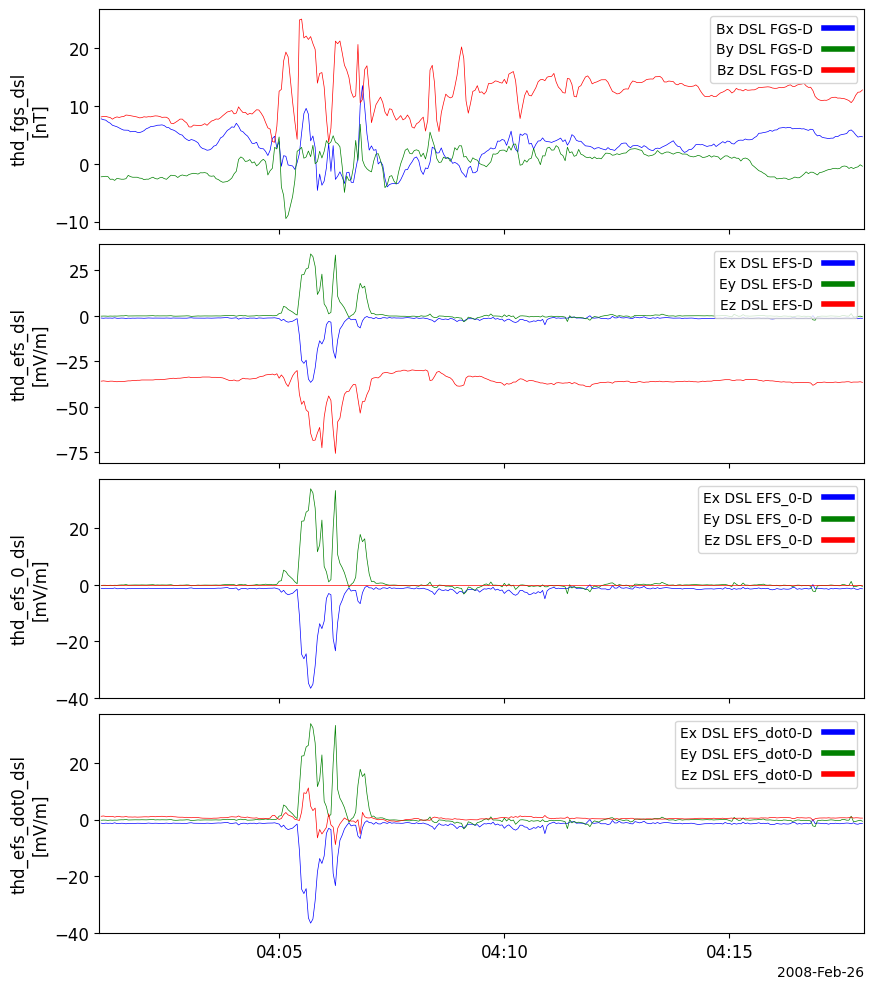

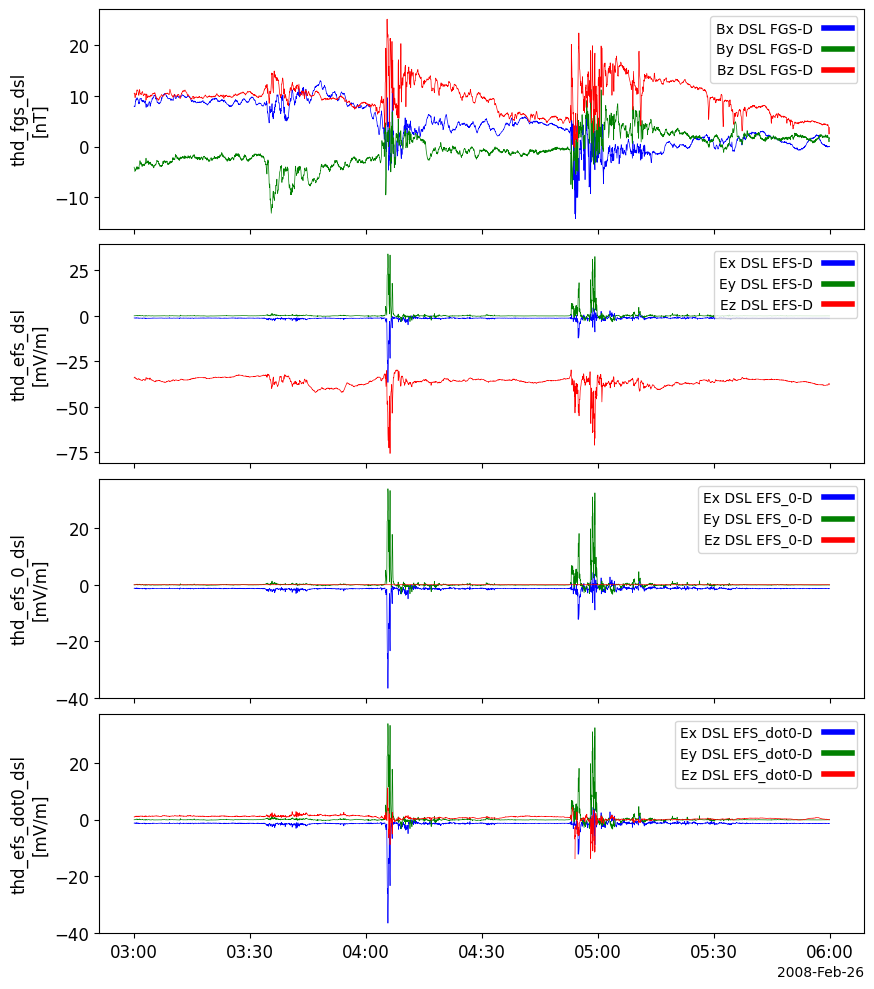

In [11]:
# view plot and identify time to zoom into:
time2zoom = ['2008/02/26 04:01:00', '2008/02/26 04:18:0']
tlimit(time2zoom); tplot(mytvars2plot,xsize=9,ysize=12)
tlimit(full='True') ; tplot(mytvars2plot,xsize=9,ysize=12)
#

In [12]:
#
# Get Ez (dsl) and ExB
#
# first get Ex/y offsets; below, named variable is data (struct) of corresponding tplot variable (string)
# view and decide what interval to use to determine offset
trange4offset=['2008-02-26/03:47:00','2008-02-26/03:56:50']
trange4offset_double=time_double(trange4offset)
i2avg=array(where((thx_efs_dsl.times >= trange4offset_double[0]) & (thx_efs_dsl.times < trange4offset_double[1])))
Exoffset = mean(thx_efs_dsl.y[i2avg,0])
Eyoffset = mean(thx_efs_dsl.y[i2avg,1])
print('Exoffset =', Exoffset)
print('Eyoffset =', Eyoffset)
#

Exoffset = -1.4260129
Eyoffset = -0.099739864


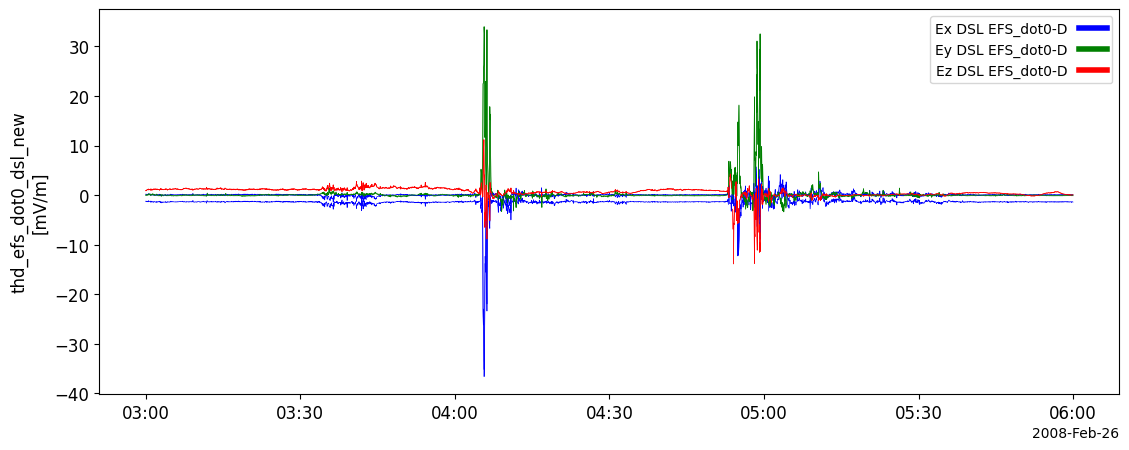

In [13]:
# remove offset from Ex, Ey thd_efs_dsl and zero-out Ez in dot0_dsl, preparing it to be corrected
thx_efs_dsl.y[:,0]=thx_efs_dsl.y[:,0]-Exoffset
thx_efs_dsl.y[:,1]=thx_efs_dsl.y[:,1]-Eyoffset
thx_efs_dot0_dsl=thx_efs_dsl # this will contain the new data in the th?_efs_dot0_dsl, to be overwritten
#
# assign the E*B=0 - computed valye for Ez when possible to the thx_efs_dot0_dsl, others will be flags
angle=10. # degrees
tanangle=tan(angle*pi/180.)
thx_efs_dsl=get_data(mysc+'_efs_0_dsl') # this gets x,y data, with Ez=0.
thx_fgs_dsl=get_data(mysc+'_fgs_dsl')
igood=where(abs(thx_fgs_dsl.y[:,2]/sqrt(thx_fgs_dsl.y[:,0]**2+thx_fgs_dsl.y[:,1]**2)) >= tanangle)
ibad= where(abs(thx_fgs_dsl.y[:,2]/sqrt(thx_fgs_dsl.y[:,0]**2+thx_fgs_dsl.y[:,1]**2)) <  tanangle)
if ibad[0].shape > (0,): thx_efs_dot0_dsl.y[ibad,:]=nan
if igood[0].shape == (0,): print('*****WARNING: NO GOOD 3D ExB data')
if igood[0].shape >  (0,): thx_efs_dot0_dsl.y[igood,2]= \
  -(thx_efs_dsl.y[igood,0]*thx_fgs_dsl.y[igood,0]+ \
    thx_efs_dsl.y[igood,1]*thx_fgs_dsl.y[igood,1])/thx_fgs_dsl.y[igood,2]
store_data('thd_efs_dot0_dsl_new',data={'x':thx_efs_dot0_dsl.times,'y':thx_efs_dot0_dsl.y})
#
# compare old and new efs_dot0
options('thd_efs_dot0_dsl_new','colors',['b','g','r'])
store_data('thd_efs_dot0_dsl2see',data=['thd_efs_dot0_dsl','thd_efs_dot0_dsl_new'])
tplot('thd_efs_dot0_dsl2see') 
#

In [14]:
# compute V=ExB/B^2
# 
tcrossp('th'+sclet+'_efs_dot0_dsl_new','th'+sclet+'_fgs_dsl',newname='thx_exb_temp')
tdotp('th'+sclet+'_fgs_dsl','th'+sclet+'_fgs_dsl',newname='thx_bdotb_temp') # form B^2 as N array
thx_bdotb_temp=get_data('thx_bdotb_temp')

In [15]:
# below will divide denominator B^2 (i.e., multiply numerator ExB) by 1000., to scale V from m/s to km/s
store_data('thx_bdotb_temp',data={'x':thx_bdotb_temp.times,\
                  'y': thx_bdotb_temp.y[:,np.newaxis]*array([1, 1, 1])/1000.}) # Nx3

True

In [16]:
thx_exb_temp=get_data('thx_exb_temp')
thx_bdotb_temp=get_data('thx_bdotb_temp')
store_data('th'+sclet+'_Vexb_dot0_dsl',data={'x':thx_exb_temp.times,'y':thx_exb_temp.y/thx_bdotb_temp.y})
#divide('thx_exb_temp','thx_bdotb_temp','th'+sclet+'_Vexb_dot0_dsl') # does not work in Jupytr notebook, works in cmd line
options('th'+sclet+'_Vexb_dot0_dsl','colors',['b','g','r'])
options('th'+sclet+'_Vexb_dot0_dsl','labels',['Vx DSL ExB','Vy DSL ExB','Vz DSL ExB'])
;

''

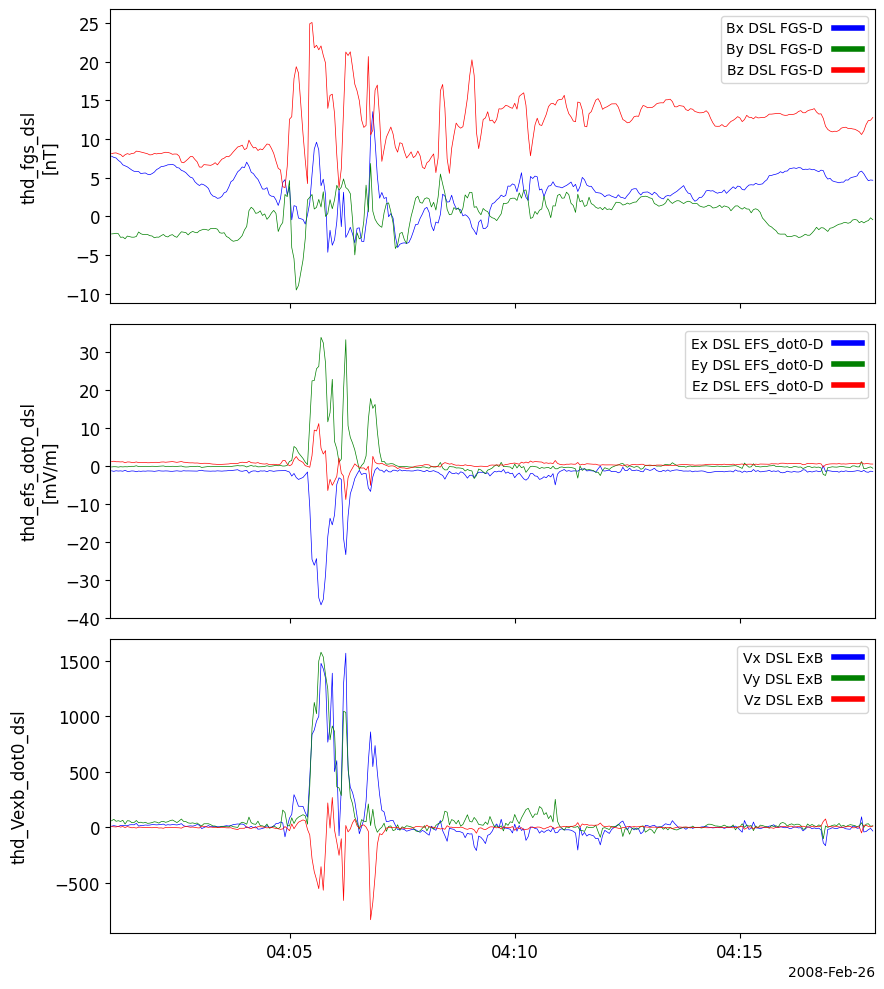

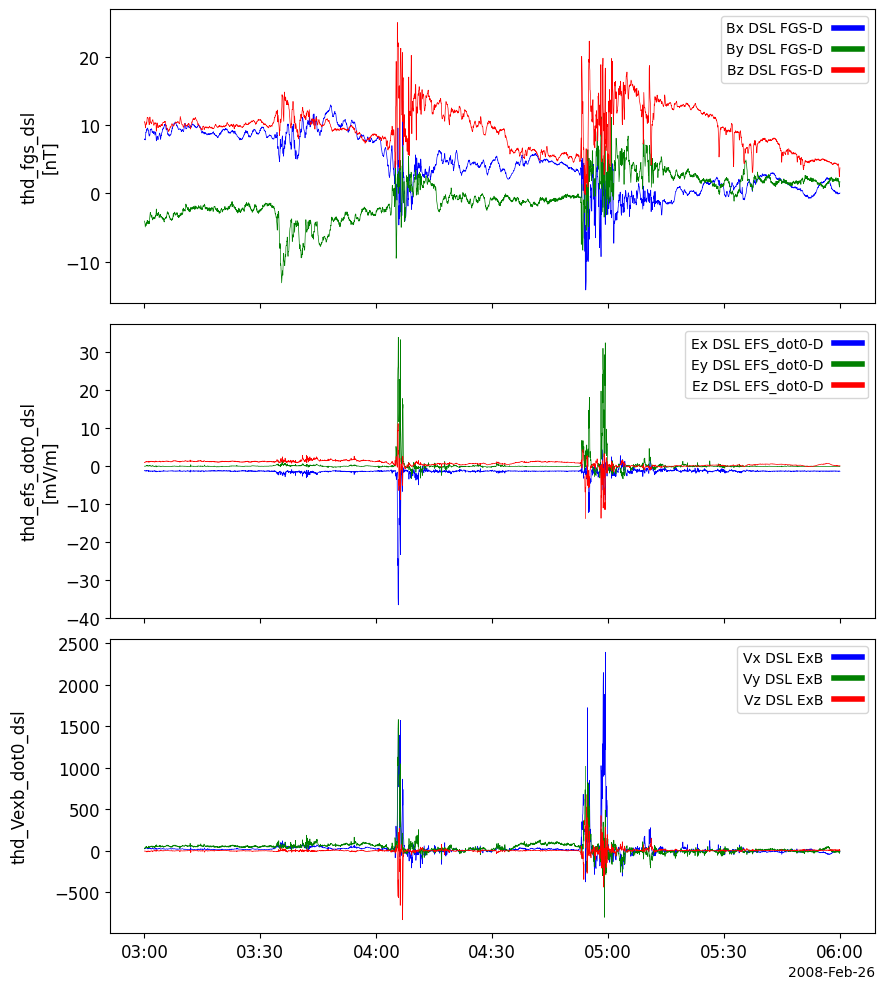

In [17]:
mytvars2plot_fin = ['th'+sclet + item for item in ['_fgs_dsl','_efs_dot0_dsl','_Vexb_dot0_dsl']]
tlimit(time2zoom)   ; tplot(mytvars2plot_fin,xsize=9,ysize=12) # also set the plot size accordingly
tlimit(full='True') ; tplot(mytvars2plot_fin,xsize=9,ysize=12)
#